#**Pythonでオープンデータ（FRED）を利用する**

このColabノートブックでは、モジュールpandas-datareaderを使って、オープンデータを利用する方法を解説します。

具体的には、FRED（後述）からオープンデータである経済統計（経済データ）をダウンロードする方法を解説します。また、最後に応用問題として日本のフィリップス曲線をプロットする方法を説明します。

なお、このノートブックは「[Pythonの第一歩](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_python入門_01_basic.ipynb)」をすでに読んでいることを前提にしています。


**FREDとは？**
<br>
FRED（Federal Reserve Economic Data）とはアメリカのセントルイス連邦準備銀行が提供している経済統計データベースです。このサイトではアメリカを含め世界各国の経済統計（経済データ）約80万種類が提供されています。提供しているデータはすべてオープンデータです（オープンデータは講義資料で説明済み）。

**FREDにチャレンジしてください**
<br>
FREDは英語で書かれたサイトなので、「英語はちょっと・・・」と思う人もいるかもしれません。私自身も英語は得意ではありませんが、FREDで必要な英語はそれほど難しくありません。FREDに使い慣れておくと皆さんの可能性が広がりますので、チャレンジしてみてください。

**FRED公式サイト**
<br>
https://fred.stlouisfed.org/

**pandas-datareader公式サイト**
<br>
https://pydata.github.io/pandas-datareader/remote_data.html#remote-data-fred

In [1]:
# 最初に重要な呪文を唱えます。
# pandas_datareaderをdrという名前で読み込みます
# 呼び出すモジュール名がpandas_datareaderであることに注意！
import pandas_datareader as dr
# pandasをpdという名前で読み込みます
import pandas as pd
#import datetime as dt # コメントアウト（現在datetimeなしで日付指定可能）


**日本の失業率とインフレ率**

FREDから日本の失業率とインフレ率をダウンロードしてみましょう。

1. FREDの日本の失業率は以下のURLから取得できます。データのIDはLRUN64TTJPA156Nです
<br>
- https://fred.stlouisfed.org/series/LRUN64TTJPA156N
2. FREDの日本のインフレ率は以下のURLはから取得できます。データのIDはFPCPITOTLZGJPNです
<br>
- https://fred.stlouisfed.org/series/FPCPITOTLZGJPN

In [2]:
jp_phillips = dr.DataReader(['LRUN64TTJPA156N', 'FPCPITOTLZGJPN'], 'fred',
                            start="1970-01-01", end="2024-01-01")
jp_phillips.tail()

,LRUN64TTJPA156N,FPCPITOTLZGJPN
DATE,,
2019-01-01,2.475000,0.468776
2020-01-01,2.941667,-0.024996
2021-01-01,2.950000,-0.233353
2022-01-01,2.758333,2.497703
2023-01-01,2.683333,NaN


まず日本の失業率を折れ線グラフでプロットしてみましょう。折れ線グラフはline plotなので、Pandasのplot.lineというメッソドを使います。

<Axes: xlabel='DATE'>

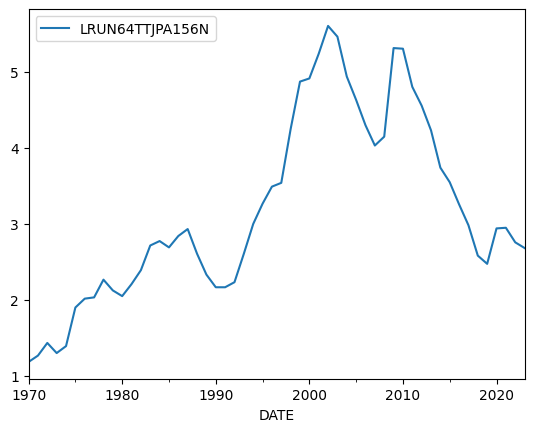

In [3]:
jp_phillips.plot.line(y='LRUN64TTJPA156N')

次に日本のインフレ率を折れ線グラフでプロットしてみましょう。同じくplot.lineを使います

<Axes: xlabel='DATE'>

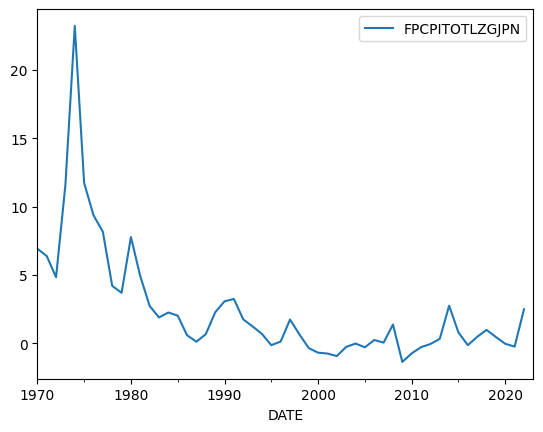

In [4]:
jp_phillips.plot.line(y='FPCPITOTLZGJPN')

**日本のフィリップス曲線**

最後に失業率とインフレ率を使って、日本のフィリップス曲線をプロットしてみましょう。フィリップス曲線に必要なデータは日本の失業率とインフレ率なので、それぞれを横軸に取り、散布図を作ります。散布図はscatter plotですから、plot.scatterというメソッドを使います。


<Axes: title={'center': 'Japanese Phillips curve'}, xlabel='LRUN64TTJPA156N', ylabel='FPCPITOTLZGJPN'>

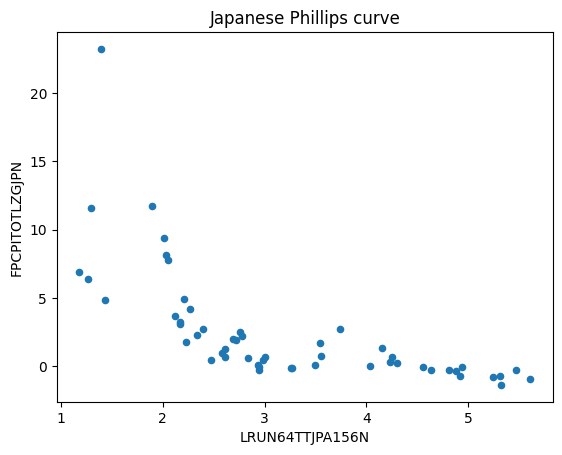

In [8]:
jp_phillips.plot.scatter(x="LRUN64TTJPA156N", y="FPCPITOTLZGJPN",
                         title='Japanese Phillips curve')

**オススメ**：Python（もしくはR）が使えるようになると、（Excelだけではできなかった）より本格的なデータ分析ができるようになります。



以下は付録です
---



まず、日本の実質GDPを探します。Googleで"FRED japan real gdp"と検索するとReal Gross Domestic Product for Japanという以下のページが見つかります。

https://fred.stlouisfed.org/series/JPNRGDPEXP

このページにあるJPNRGDPEXPという文字列が「日本の実質GDP」を意味していますので、このJPNRGDPEXPを使ってFREDからデータをダウンロードします。

<Axes: xlabel='DATE'>

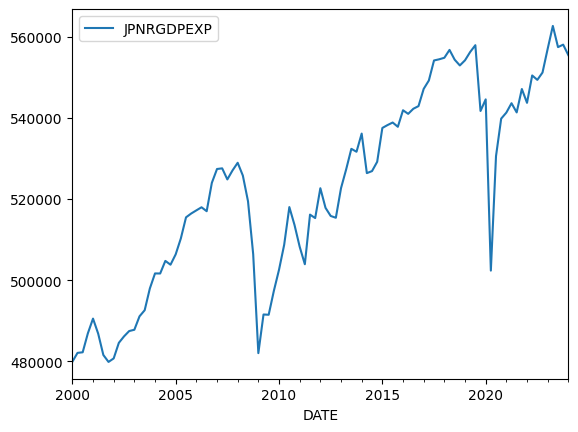

In [ ]:
jp_real_gdp = dr.DataReader('JPNRGDPEXP', 'fred',start="2000-01-01")

jp_real_gdp.plot()

jp_real_gdpにどのようなデータが入っているのか少し見たい場合はhead()というメソッドを使うか、display()という関数を使うのがお勧めです（どちらを使うかは場合によります）。

In [ ]:
jp_real_gdp.head()
#display(jp_real_gdp)

,JPNRGDPEXP
DATE,
2000-01-01,479923.9
2000-04-01,482112.7
2000-07-01,482257.1
2000-10-01,486913.0
2001-01-01,490555.0


次にアメリカ合衆国の実質GDPをダウンロードすることを考えてみましょう。Googleで"FRED US real gdp"と検索するとReal Gross Domestic Product (GDPC1)という以下のページが見つかります。

https://fred.stlouisfed.org/series/GDPC1

このページにあるGDPC1という文字列が「アメリカの実質GDP」を意味していますので、このGDPC1を使ってFREDからデータをダウンロードします。

<Axes: xlabel='DATE'>

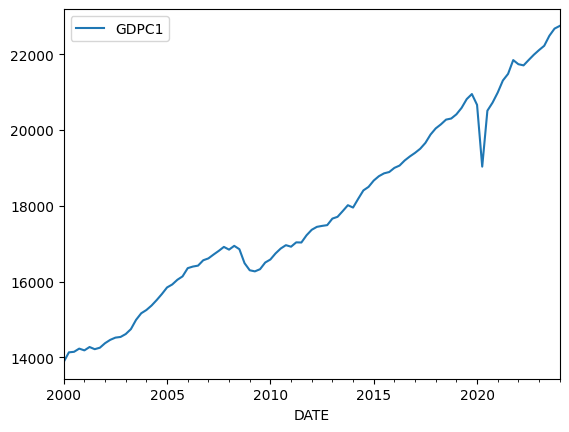

In [ ]:
us_real_gdp = dr.DataReader('GDPC1', 'fred', start="2000-01-01")
us_real_gdp.plot()

**日・米・仏の失業率**

日・米・仏の失業率をプロットする方法を考えてみましょう。今までと同じように検索を使って、FREDから該当する経済統計（経済データ）を探します。

https://fred.stlouisfed.org/series/LRUN64TTJPM156S

https://fred.stlouisfed.org/series/UNRATE

https://fred.stlouisfed.org/series/LRHUTTTTFRM156S

これらをFREDからダウンロードします。期間は2018年1月から2021年2月末までとします。

<Axes: xlabel='DATE'>

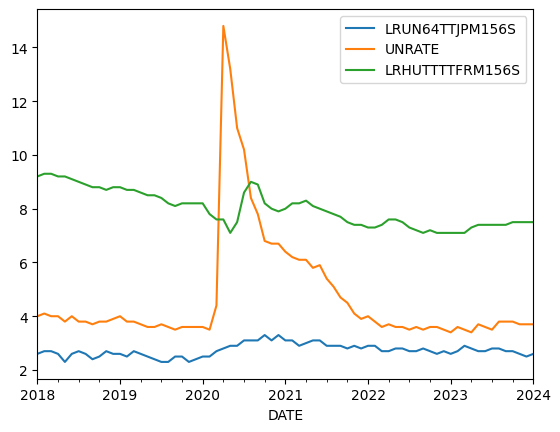

In [ ]:
#start = dt.datetime(2018, 1, 1)
#end = dt.datetime(2021, 2, 28)

jp_us_unemp = dr.DataReader(['LRUN64TTJPM156S', 'UNRATE', 'LRHUTTTTFRM156S'], 'fred',
                            start="2018-01-01", end="2024-01-01")

jp_us_unemp.plot()

日米仏の失業率の変化はそれぞの国の違いが出て興味深い結果となりました。

散布図を使ってフィリップス曲線をプロットしてみましょう。

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

これで日本のフィリップス曲線が表示されました。案外簡単ですね。

この例から「Pythonを学ぶと効率的にデータ分析ができるようになる」ことを分かってもらえればと思います。

> なお、授業で説明したとおり、散布図や相関係数は相関を示すときには有力な手法ですが、因果を意味するわけではありません。



**まとめ**

pandas_datareaderはFRED以外にもいろいろな経済統計データベース（オープンデータ）からデータを一気にダウンロードできる便利なモジュールです。

興味が湧いた人は公式サイトや以下の参考文献をみて、ぜひいろいろと試してみてください。

**公式サイト**
<br>
https://pydata.github.io/pandas-datareader/remote_data.html
<br>
<br>
**参考文献**

https://medium.com/swlh/pandas-datareader-federal-reserve-economic-data-fred-a360c5795013

https://dev.classmethod.jp/articles/pandas_datareader-python/

https://qiita.com/innovation1005/items/edcf78cbf89477b3b0a7
